# Testes com busca (euclidean distances) utilizando feature extraction do imagenet

In [1]:
from collections import Counter
import numpy as np
import os
import random
import tensorflow as tf

from sklearn.metrics.pairwise import euclidean_distances
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time


caminho_bases = os.path.join('..', 'bases', 'chest_xray')
caminho_train = os.path.join(caminho_bases, 'train')
caminho_test = os.path.join(caminho_bases, 'test')

SIZE = (224, 224)

# Recupera imagens

In [2]:
datagen = ImageDataGenerator(
    rescale=1./255,
)
train_generator = datagen.flow_from_directory(
    caminho_train,
    target_size=SIZE,
    batch_size=512,
    class_mode='binary',
    shuffle=True
)
validation_generator = datagen.flow_from_directory(
    caminho_test,
    target_size=SIZE,
    batch_size=256,
    class_mode='binary',
    shuffle=True
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Models

In [3]:
base_model = DenseNet121(weights='imagenet',
                         input_shape=(*SIZE, 3), 
                         include_top=False,
                         pooling='max')

In [4]:
base_model_avg = DenseNet121(weights='imagenet',
                         input_shape=(*SIZE, 3), 
                         include_top=False,
                         pooling='avg')

In [5]:
batch, labels = next(validation_generator)
features_batch = base_model.predict(batch)

In [6]:
ind = random.randint(0, len(features_batch))
distances = euclidean_distances([features_batch[ind]], features_batch)
sequence = np.argsort(distances)[0]
print(ind, sequence)

155 [155  90  92  56 186  33 174  58 190 116 153 215  79 172  41 244 240 211
  61 141   9 231 253 182 254 171 133 181 103  35  73 241 135  68 203 234
 160 113 248  63 142 198 209 176  91 207  37  26 147  55 196 156  82  70
  97 120 107   2  34 139  22  49 200 213 227  62  96 195 144  21   8  84
  48 124 194 212  47  44 247 236 126   4 225  65   7  46  76  12 159 232
  66 233 185 197 114 188 130 201 143 154 112 127 108  59 184  25 255 118
 140  50  40  18 180 187  17 216 164 115   1 152 239 104 168  54 249 193
  93 166  15 146  24 162 106  86 105 165 243 131 101 179 220  30  99 238
 145  36  19 229  94 242 217 137 223  43  32  69  71 170 252 117  29 134
 119 173 109  14 122  20 149  10 136  83 219 138  74 191 226 163 228  13
  16 129 123   6 189 246 177  80  57 245  51   3  77  81  88  67  75  64
 111 221  27 235  78  87 230 199  85  60  38 125 100 178 224  28 169 206
  39 250  45 210  72  23 192 204 202 205 218 251 128 222  95 167 175  42
 158  53 208 183 161   5  98 132 151 150  11 11

In [7]:
print(labels[ind], labels[sequence] )

1.0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1.
 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0.]


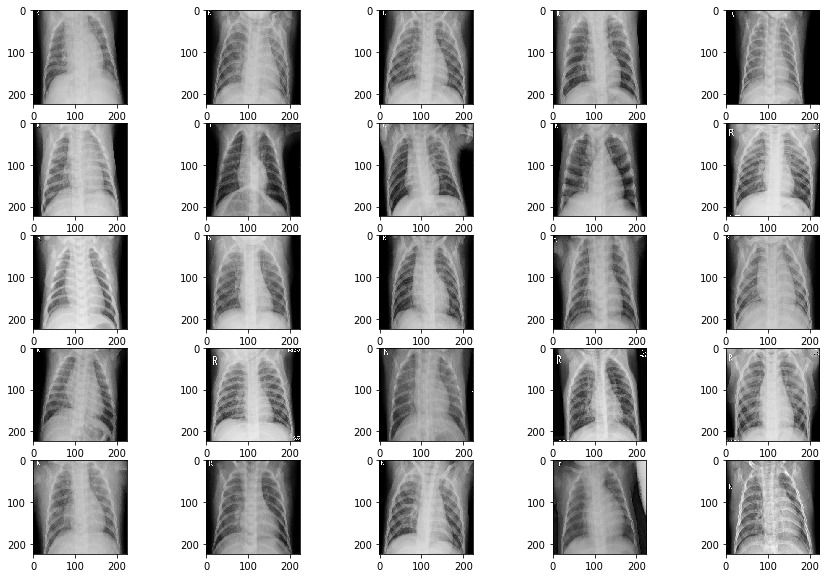

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axes = plt.subplots(5, 5, figsize=(15, 10))
for row in range(5):
    for col in range(5):
        img_ind = row * 5 + col
        axes[col, row].imshow(batch[sequence[img_ind]])


In [9]:
ind = random.randint(0, len(features_batch))
distances = euclidean_distances([features_batch[ind]], features_batch)
sequence = np.argsort(distances)[0]
print(ind, sequence)

144 [144 207 196 118 234 120 114 154   2  62 254 131 232 176 153 156 168  40
  58 162 126 225 166  97 215  24 182 103 134 163  91 239 217 172 216 197
 253  94  80  17 211 123 188 241  92 139 133  54  74  33 140  34 116 198
 248 190 147 229 135 159 255  56  55 185  61 152  41  57  49  47  37  23
 186 244  73  63  90 179 184 108 160 187 233 242  44  60  46 240   7  48
 245 165 243  30   9 200  84  36 124  77 181 174 101  96 130 223  70 212
  26  79 142 209 100 143 203  88 251 231  99 106  64 189 115   4  68  22
 252 238   3 141  18 137  12 247  65 173  20 158 105 235 180 195  86 194
 138 111  82 113 210  81  75  53  14 208  43 146  72 236 104 127  59 201
  10  21 219 164  28 119  27 177 155 171 107 109  78  51  16 193 117 149
 224   1 213 226   8  15 250  50  83  39 227  19 169 220 249  87 112 125
  66 132 228 136   6 110  71 145 199  13  35 191  25 128 175 218  45 246
 206 230  93 222 122  42  98  11  95 221 183 192 161 204 167 150  69  76
  67 170  32  31 151 148  85 129  38 205  89  2

In [10]:
print(labels[ind], labels[sequence])

1.0 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0.
 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0.
 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1.
 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1.
 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.]


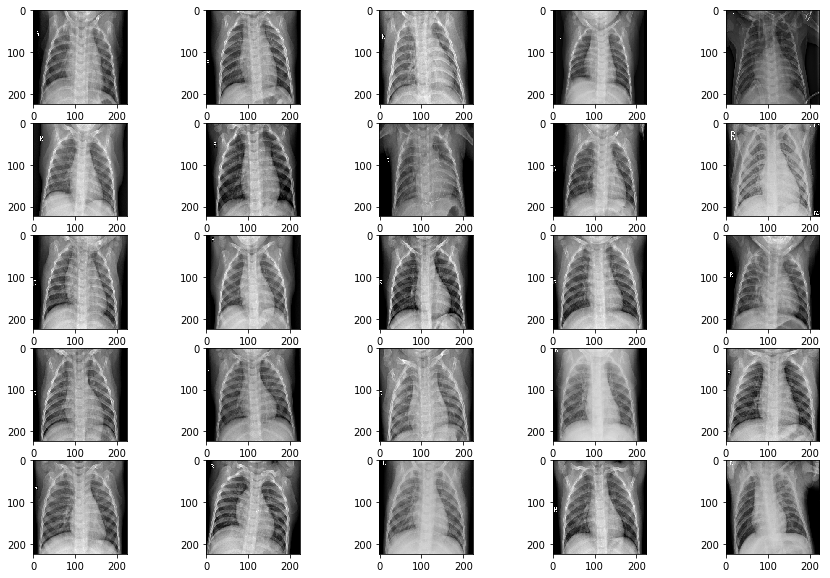

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axes = plt.subplots(5, 5, figsize=(15, 10))
for row in range(5):
    for col in range(5):
        img_ind = row * 5 + col
        axes[col, row].imshow(batch[sequence[img_ind]])


In [12]:
def get_batch(generator, model=base_model):
    batch, labels = next(validation_generator)
    features_batch = model.predict(batch)
    return features_batch, labels
    
def get_sequence(features, ind):
    distances = euclidean_distances([features[ind]], features)
    sequence = np.argsort(distances)[0]
    return sequence


In [13]:
ROUNDS = 1000
# Coincidências de classe em 10 itens
train_generator.reset()
for r in range(1, 6):
    X, y = get_batch(train_generator)
    acerto_batch = 0
    for s in range(ROUNDS):
        ind = random.randint(0, len(y) - 1)
        seq = get_sequence(X, ind)
        acertos = sum(y[ind] ==  y[seq][:10])
        # print(s, acertos)
        acerto_batch += acertos
    print('Acertos no batch {:d}: {:0.2f}'.format(r, acerto_batch / (ROUNDS * 10)))


Acertos no batch 1: 0.86
Acertos no batch 2: 0.83
Acertos no batch 3: 0.83
Acertos no batch 4: 0.86
Acertos no batch 5: 0.81


In [14]:
validation_generator.reset()
for r in range(1, 6):
    X, y = get_batch(validation_generator)
    acerto_batch = 0
    for s in range(ROUNDS):
        ind = random.randint(0, len(y) - 1)
        seq = get_sequence(X, ind)
        acertos = sum(y[ind] ==  y[seq][:10])
        # print(s, acertos)
        acerto_batch += acertos
    print('Acertos no batch {:d}: {:0.2f}'.format(r, acerto_batch / (ROUNDS * 10) ))


Acertos no batch 1: 0.86
Acertos no batch 2: 0.83
Acertos no batch 3: 0.80
Acertos no batch 4: 0.83
Acertos no batch 5: 0.83


In [15]:
# Coincidências de classe em 20 itens
train_generator.reset()
for r in range(1, 11):
    X, y = get_batch(train_generator)
    acerto_batch = 0
    for s in range(ROUNDS):
        ind = random.randint(0, len(y) - 1)
        seq = get_sequence(X, ind)
        acertos = sum(y[ind] ==  y[seq][:20])
        # print(s, acertos)
        acerto_batch += acertos
    print('Acertos no batch {:d}: {:0.2f}'.format(r, acerto_batch / (ROUNDS * 20)))


Acertos no batch 1: 0.77
Acertos no batch 2: 0.82
Acertos no batch 3: 0.78
Acertos no batch 4: 0.76
Acertos no batch 5: 0.83
Acertos no batch 6: 0.80
Acertos no batch 7: 0.77
Acertos no batch 8: 0.84
Acertos no batch 9: 0.81
Acertos no batch 10: 0.72


In [16]:
# Coincidências de classe em 20 itens - por classe
train_generator.reset()
acerto_total = Counter()
total = Counter()
for r in range(1, 11):
    X, y = get_batch(train_generator)
    acerto_batch = 0
    for s in range(ROUNDS):
        ind = random.randint(0, len(y) - 1)
        seq = get_sequence(X, ind)
        acertos = sum(y[ind] ==  y[seq][:20])
        total[y[ind]] += 20
        acerto_total[y[ind]] += acertos
        # print(s, acertos)
        acerto_batch += acertos
    print('Acertos no batch {:d}: {:0.2f}'.format(r, acerto_batch / (ROUNDS * 20)))


Acertos no batch 1: 0.83
Acertos no batch 2: 0.81
Acertos no batch 3: 0.71
Acertos no batch 4: 0.80
Acertos no batch 5: 0.79
Acertos no batch 6: 0.76
Acertos no batch 7: 0.79
Acertos no batch 8: 0.82
Acertos no batch 9: 0.79
Acertos no batch 10: 0.78


In [17]:
print('0 = não vazio\n1 = vazio')
for classe in [0, 1]:
    print('Acerto classe {}: {:d} de {:d} ({:0.2f})'.format(
           classe, acerto_total[classe], total[classe],
           (acerto_total[classe] / total[classe]) )
         )


0 = não vazio
1 = vazio
Acerto classe 0: 53959 de 72780 (0.74)
Acerto classe 1: 103373 de 127220 (0.81)


## Repetir teste utilizando modelo AvgPool

In [18]:
# Coincidências de classe em 20 itens - por classe
train_generator.reset()
acerto_total = Counter()
total = Counter()
for r in range(1, 11):
    X, y = get_batch(train_generator, base_model_avg)
    acerto_batch = 0
    for s in range(ROUNDS):
        ind = random.randint(0, len(y) - 1)
        seq = get_sequence(X, ind)
        acertos = sum(y[ind] ==  y[seq][:20])
        total[y[ind]] += 20
        acerto_total[y[ind]] += acertos
        # print(s, acertos)
        acerto_batch += acertos
    print('Acertos no batch {:d}: {:0.2f}'.format(r, acerto_batch / (ROUNDS * 20)))

print('0 = não vazio\n1 = vazio')
for classe in [0, 1]:
    print('Acerto classe {}: {:d} de {:d} ({:0.2f})'.format(
           classe, acerto_total[classe], total[classe],
           (acerto_total[classe] / total[classe]) )
         )


Acertos no batch 1: 0.85
Acertos no batch 2: 0.72
Acertos no batch 3: 0.82
Acertos no batch 4: 0.81
Acertos no batch 5: 0.78
Acertos no batch 6: 0.82
Acertos no batch 7: 0.80
Acertos no batch 8: 0.77
Acertos no batch 9: 0.84
Acertos no batch 10: 0.78
0 = não vazio
1 = vazio
Acerto classe 0: 55893 de 75900 (0.74)
Acerto classe 1: 103782 de 124100 (0.84)
